In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LinearRegression

In [2]:
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df[['petal length (cm)', 'petal width (cm)']]

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


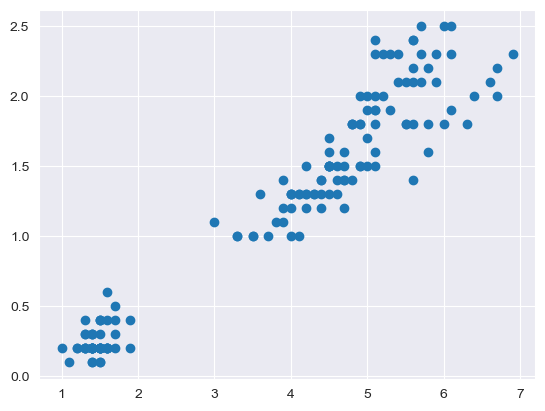

In [3]:
X = iris_df['petal length (cm)']
y = iris_df['petal width (cm)']
plt.scatter(X, y)

In [24]:
lr = LinearRegression()
lr.fit(X.values.reshape(-1, 1), y)

print(lr.coef_)
print(lr.intercept_)

x_values = X.values[0:10].reshape(-1, 1)
y_values = lr.predict(x_values.reshape(-1, 1))
# print(y_values)
# print(y[0:10])

[0.41575542]
-0.3630755213190304
